In [15]:
import pandas as pd


In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.read_csv('C:/Users/Hp/Desktop/priya/winequality-white.csv')

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
...,...
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...


In [7]:
red = pd.read_csv('C:/Users/Hp/Desktop/priya/winequality-red.csv', low_memory=False, sep=';')


In [8]:
red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
white = pd.read_csv('C:/Users/Hp/Desktop/priya/winequality-white.csv', low_memory=False, sep=';')



In [14]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
# Function to select red or white dataset

def call(functionToCall):
    print('\nRed Wine\n')
    functionToCall(red)
    print('\nWhite Wine\n')
    functionToCall(white)

In [17]:
# Remove spaces from column names
def rm(wine_set):
    wine_set.columns = [x.strip().replace(' ','_') for x in wine_set.columns]
call(rm)


Red Wine


White Wine



In [18]:
red.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
white.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Red Wine



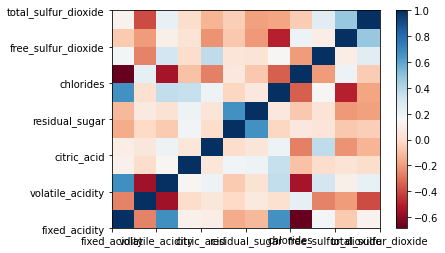


White Wine



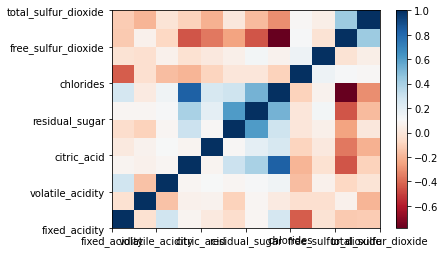

In [24]:
#Covarience matrix
def covmax(wine_set):
    cov_mat = wine_set.corr(method = 'pearson')
    fig = plt.figure().add_subplot(111)
    plt.pcolor(cov_mat, cmap = 'RdBu')

    plt.colorbar()
    fig.set_xticklabels(wine_set.columns)
    fig.set_yticklabels(wine_set.columns)
    plt.show()
call(covmax)

In [25]:
import seaborn as sns

In [28]:
raw_data=pd.read_csv('C:/Users/Hp/Desktop/priya/winequality-white.csv')

In [30]:
raw_data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [34]:
# Add a column 'quality_mark'
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]
    
    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'
    
    frames = [low, medium, high]
    return pd.concat(frames)


In [35]:
# Calculating the F-statistics and associated p-value
def anova(wine_set):
    prepared_data = add_categ_quality(wine_set)
    model1 = smf.ols(formula='total_sulfur_dioxide ~ C(quality_mark)', data = prepared_data)
    results1 = model1.fit()
    print(results1.summary())
    
    sub = prepared_data[['total_sulfur_dioxide', 'quality_mark']]
    print("\nMeans for total sulfur dioxide by quality marks of wine \n")
    print(sub.groupby('quality_mark').mean())
    print('\nStandard deviation for total sulfur dioxide by quality marks of wine \n')
    print(sub.groupby('quality_mark').std(), '\n')
    
    # Perform Post hoc test
    mc1 = multi.MultiComparison(sub['total_sulfur_dioxide'], sub['quality_mark'])
    res1 = mc1.tukeyhsd()
    print(res1.summary())
    
call(anova)


Red Wine

                             OLS Regression Results                             
Dep. Variable:     total_sulfur_dioxide   R-squared:                       0.054
Model:                              OLS   Adj. R-squared:                  0.053
Method:                   Least Squares   F-statistic:                     45.71
Date:                  Wed, 12 May 2021   Prob (F-statistic):           4.97e-20
Time:                          16:25:02   Log-Likelihood:                -7809.7
No. Observations:                  1599   AIC:                         1.563e+04
Df Residuals:                      1596   BIC:                         1.564e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------


Red Wine



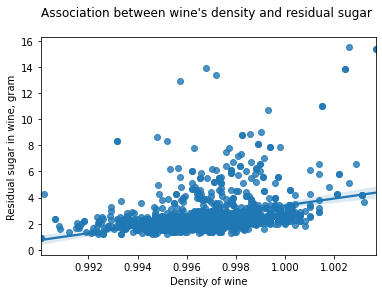

(0.35528337098337653, 9.013041728300921e-49)

White Wine



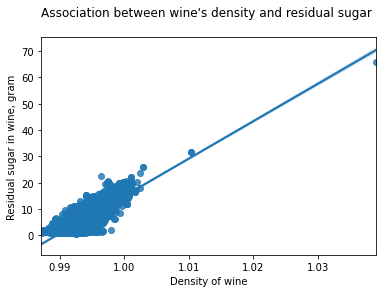

(0.8389664549045835, 0.0)


In [36]:
# Pearson Correlation
def pearson(wine_set):
    scat1 = seaborn.regplot(x = "density", y = "residual_sugar", fit_reg = True, data = wine_set)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar \n")
    plt.show()

    print(scipy.stats.pearsonr(wine_set['density'], wine_set["residual_sugar"]))

call(pearson)


Red Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.40512747741473676, 9.3299903047261e-31)

of `medium` quality
(0.33017251719442087, 9.754348168742952e-23)

of `high` quality
(0.5797231322874935, 0.011679205341894067)


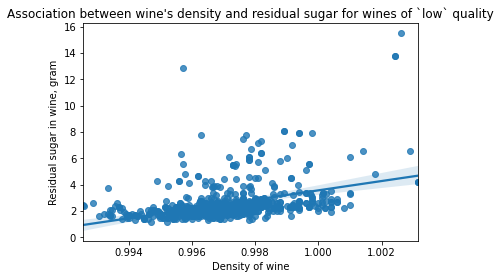

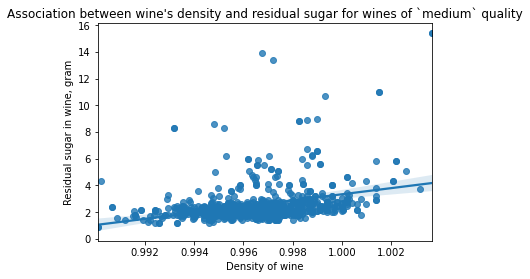

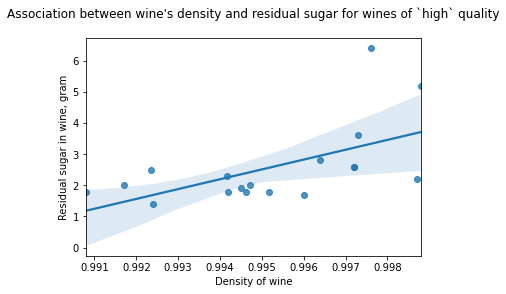


White Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.8796644895829153, 0.0)

of `medium` quality
(0.8458419941200983, 0.0)

of `high` quality
(0.8210870208105547, 3.2743806268829206e-45)


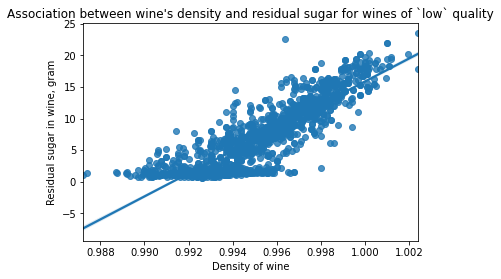

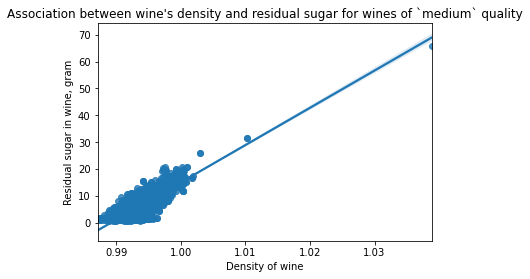

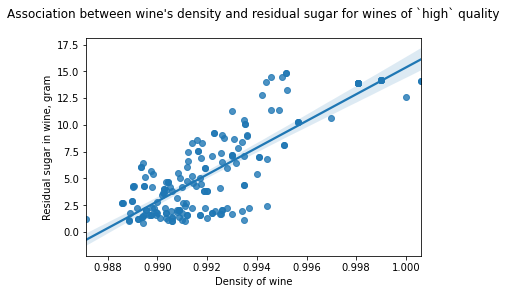

In [38]:
#Exploring Statistical Interactions
def explore(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    print('association between wine`s density and residual sugar for wines \nof `low` quality')
    print(scipy.stats.pearsonr(low['density'], low["residual_sugar"]))
    print('\nof `medium` quality')
    print(scipy.stats.pearsonr(medium['density'], medium["residual_sugar"]))
    print('\nof `high` quality')
    print(scipy.stats.pearsonr(high['density'], high["residual_sugar"]))

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=low)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `low` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=medium)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `medium` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=high)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `high` quality\n")
    plt.show()

call(explore)


Red Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.40512747741473676, 9.3299903047261e-31)

of `medium` quality
(0.33017251719442087, 9.754348168742952e-23)

of `high` quality
(0.5797231322874935, 0.011679205341894067)


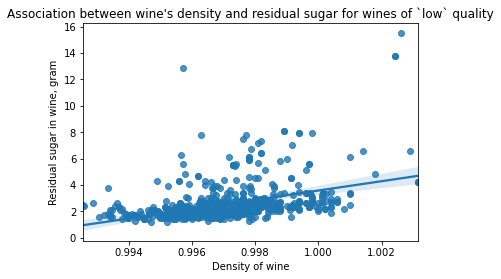

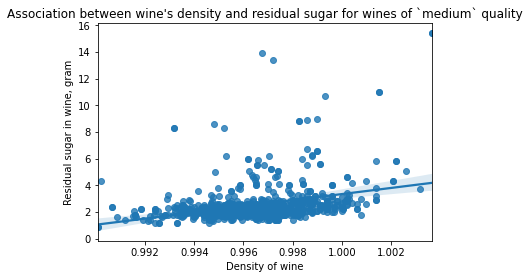

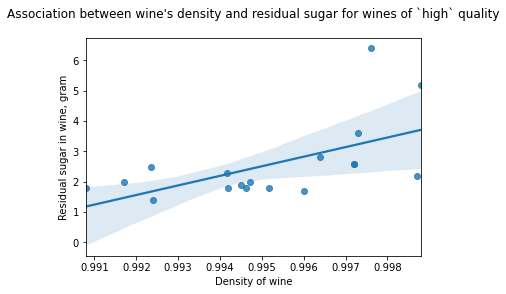


White Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.8796644895829153, 0.0)

of `medium` quality
(0.8458419941200983, 0.0)

of `high` quality
(0.8210870208105547, 3.2743806268829206e-45)


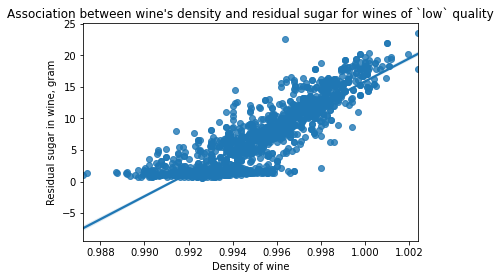

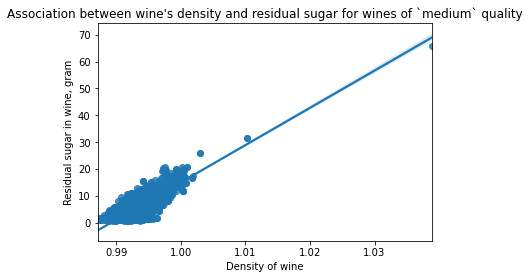

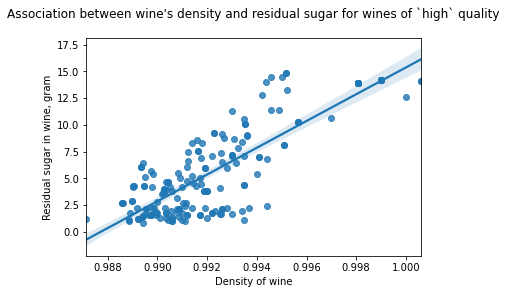

In [40]:

def explore(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    print('association between wine`s density and residual sugar for wines \nof `low` quality')
    print(scipy.stats.pearsonr(low['density'], low["residual_sugar"]))
    print('\nof `medium` quality')
    print(scipy.stats.pearsonr(medium['density'], medium["residual_sugar"]))
    print('\nof `high` quality')
    print(scipy.stats.pearsonr(high['density'], high["residual_sugar"]))

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=low)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `low` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=medium)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `medium` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=high)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `high` quality\n")
    plt.show()

call(explore)

In [41]:
def basicInfo(wine_set):
    print(len(wine_set))
    print(len(wine_set.columns))
    print(list(wine_set.columns.values))
    print(wine_set.ix[:10,:4])
    print('\n')
    print("--------------describe the data-----------------")
    print('\n')
    print(wine_set.describe())

call(basicInfo)


Red Wine

1599
12
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


AttributeError: 'DataFrame' object has no attribute 'ix'

In [42]:
def basicInfo(wine_set):
    print(len(wine_set))
    print(len(wine_set.columns))
    print(list(wine_set.columns.values))
    print(wine_set.ix[:10,:4])
    print('\n')
    print("--------------describe the data-----------------")
    print('\n')
    print(wine_set.describe())

call(basicInfo)


Red Wine

1599
12
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


AttributeError: 'DataFrame' object has no attribute 'ix'

In [43]:
def frequencyDists(wine_set):
    print("This is the frequency distribution of the wines' quality.")
    print(wine_set.groupby("quality").size()*100 / len(wine_set))
    print()

call(frequencyDists)


Red Wine

This is the frequency distribution of the wines' quality.
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
dtype: float64


White Wine

This is the frequency distribution of the wines' quality.
quality
3     0.408330
4     3.327889
5    29.746835
6    44.875459
7    17.966517
8     3.572887
9     0.102082
dtype: float64



In [44]:
# print quartile split of the quality variable 
def quartileSplit(wine_set):
    print("This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;")
    print("II-nd - the number of wine samples with the quality in the corresponding interval.")
    wine_set["quality_quart"] = pd.qcut(wine_set["quality"], 3)
    print(wine_set.groupby("quality_quart").size())

call(quartileSplit)


Red Wine

This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    744
(5.0, 6.0]      638
(6.0, 8.0]      217
dtype: int64

White Wine

This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    1640
(5.0, 6.0]      2198
(6.0, 9.0]      1060
dtype: int64



Red Wine



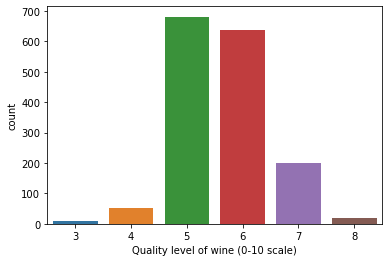


White Wine



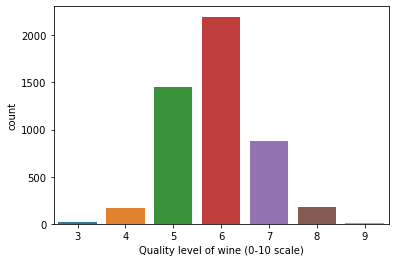

In [45]:
 #Visualization  with countplots and factorplots
def countplots(wine_set):
    wine_set["quality"] = pd.Categorical(wine_set["quality"])
    seaborn.countplot(x="quality", data=wine_set)
    plt.xlabel("Quality level of wine (0-10 scale)")
    plt.show()

call(countplots)


Red Wine



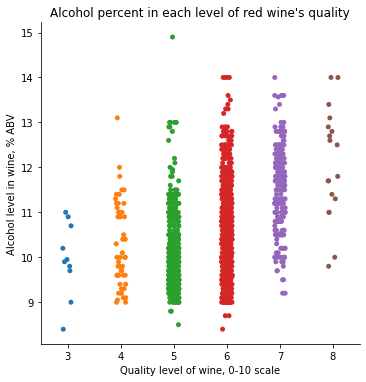


White Wine



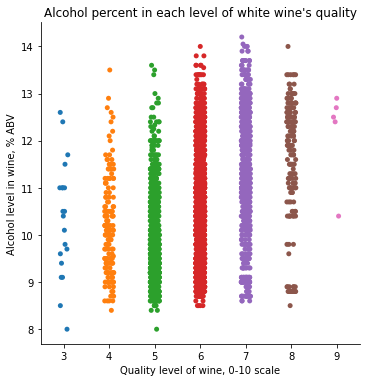

In [46]:
def factorplots(wine_set):
    seaborn.factorplot(x="quality", y="alcohol", data=wine_set, kind="strip")
    plt.xlabel("Quality level of wine, 0-10 scale")
    plt.ylabel("Alcohol level in wine, % ABV")
    if wine_set.equals(red):
        plt.title("Alcohol percent in each level of red wine's quality")
    else:
        plt.title("Alcohol percent in each level of white wine's quality")
    plt.show()

call(factorplots)


Red Wine



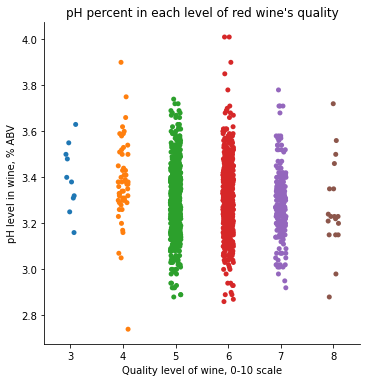


White Wine



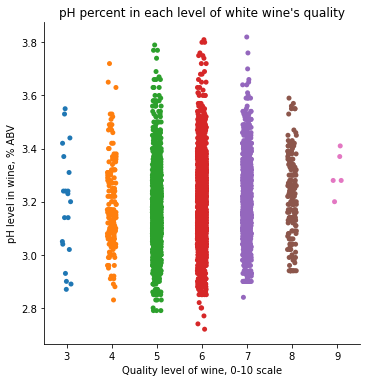

In [47]:
def factorplots(wine_set):
    seaborn.factorplot(x="quality", y="pH", data=wine_set, kind="strip")
    plt.xlabel("Quality level of wine, 0-10 scale")
    plt.ylabel("pH level in wine, % ABV")
    if wine_set.equals(red):
        plt.title("pH percent in each level of red wine's quality")
    else:
        plt.title("pH percent in each level of white wine's quality")
    plt.show()

call(factorplots)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = tarin_test_split(x,y,test_size=0.3)


NameError: name 'tarin_test_split' is not defined

In [59]:
from sklearn.linear_model import LinearRegression

In [62]:
model=LinearRegression()

In [64]:
model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [66]:
import scipy
from scipy.io import arff
from sklearn.datasets import make_multilabel_classification

In [67]:
X, y = make_multilabel_classification(sparse = True, n_labels = 20,
return_indicator = 'sparse', allow_unlabeled = False)

In [72]:
classifier=LinearRegression


In [73]:
def quartileSplit(wine_set):
    print("This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;")
    print("II-nd - the number of wine samples with the quality in the corresponding interval.")
    wine_set["quality_quart"] = pd.qcut(wine_set["quality"], 3)
    print(wine_set.groupby("quality_quart").size())

call(quartileSplit)



Red Wine

This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    744
(5.0, 6.0]      638
(6.0, 8.0]      217
dtype: int64

White Wine

This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    1640
(5.0, 6.0]      2198
(6.0, 9.0]      1060
dtype: int64


In [74]:
from sklearn.neighbors import KNeighborsClassifier


In [76]:
from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [100]:
raw_data=pd.read_csv('C:/Users/Hp/Desktop/priya/winequality-white.csv')

In [102]:
predictions=model.predict(x_test)

NameError: name 'x_test' is not defined

In [106]:
df=pd.read_csv('C:/Users/Hp/Desktop/priya/winequality-white.csv')
df.shape

(4898, 1)

In [107]:
df.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [108]:
df.describe

<bound method NDFrame.describe of      fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1     6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2     8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                              

In [111]:
df.isnull().any().any()

False

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB


In [110]:
df.isnull().any().any()

False

In [113]:
for col in df.columns.values:
    print("number of unique values of {}:{} ".format(col,df[col].nunique()))

number of unique values of fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality":3961 


In [ ]:
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[col],color="r",kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [ ]:
sns.pairplot(data=df,kind='scatter',diag_kind='kde')

In [136]:
fig = plt.figure(figsize = (10,20))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

ValueError: Could not interpret input 'quality'

<Figure size 720x1440 with 0 Axes>

In [ ]:
qa

In [124]:
def log_regression(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set
     # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)
    #split into training and testing sets
    predictors = wine_set[["sulphates", 'alcohol']]
    targets = wine_set.quality_c
    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    classifier = LogisticRegression()
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)
print('----------------Logistic Regression------------------------')
call(log_regression)




----------------Logistic Regression------------------------

Red Wine

Confusion Matrix:
 [[181 106]
 [ 95 258]]
Accuracy: 0.6859375
Score: 0.6859375
RMSE: 0.5604127942864974

White Wine

Confusion Matrix:
 [[ 255  403]
 [ 196 1106]]
Accuracy: 0.6943877551020409
Score: 0.6943877551020409
RMSE: 0.5528220734539814


In [90]:
def decis_tree(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    classifier = DecisionTreeClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Decision Tree------------------------')
call(decis_tree)








----------------Decision Tree------------------------

Red Wine

Confusion Matrix:
 [[201  86]
 [105 248]]
Accuracy: 0.7015625
Score: 0.7015625
RMSE: 0.546294334585304

White Wine

Confusion Matrix:
 [[ 378  271]
 [ 293 1018]]
Accuracy: 0.7122448979591837
Score: 0.7122448979591837
RMSE: 0.5364280958719596


In [91]:
def knn(wine_set):
    
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    
    
    # build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
print('----------------KNN------------------------')
call(knn)

----------------KNN------------------------

Red Wine

Confusion Matrix:
 [[182 111]
 [116 231]]
Accuracy: 0.6453125
Score: 0.6453125
RMSE: 0.5955564624785797

White Wine

Confusion Matrix:
 [[ 329  343]
 [ 248 1040]]
Accuracy: 0.698469387755102
Score: 0.698469387755102
RMSE: 0.5491180312509306


In [93]:
def naive(wine_set):
   
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    

    classifier = GaussianNB()
    classifier.fit(pred_train, tar_train)
    predictionsG = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsG))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsG))
    print("Gaus:" + str(classifier.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsG, tar_test)
    print('MSE:',mse ** 0.5)

    classifierm = MultinomialNB()
    classifierm.fit(pred_train, tar_train)
    predictionsM = classifierm.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsM))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsM))
    print("Multi:" + str(classifierm.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsM, tar_test)
    print('MSE:',mse ** 0.5)
    classifierb = BernoulliNB()
    classifierb.fit(pred_train, tar_train)
    predictionsB = classifierb.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsB))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsB))
    print("Bernoulli:" + str(classifierb.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsB, tar_test)
    print('MSE:',mse ** 0.5)
    

print('----------------Naive Bayes------------------------')
call(naive)

----------------Naive Bayes------------------------

Red Wine

Confusion Matrix:
 [[221  70]
 [110 239]]
Accuracy: 0.71875
Gaus:0.71875
MSE: 0.5303300858899106

Confusion Matrix:
 [[142 149]
 [ 92 257]]
Accuracy: 0.6234375
Multi:0.6234375
MSE: 0.6136468854316789

Confusion Matrix:
 [[ 28 263]
 [ 31 318]]
Accuracy: 0.540625
Bernoulli:0.540625
MSE: 0.677772085586298

White Wine

Confusion Matrix:
 [[ 359  305]
 [ 278 1018]]
Accuracy: 0.7025510204081633
Gaus:0.7025510204081633
MSE: 0.5453888333948879

Confusion Matrix:
 [[ 270  394]
 [ 288 1008]]
Accuracy: 0.6520408163265307
Multi:0.6520408163265307
MSE: 0.5898806520589308

Confusion Matrix:
 [[   3  661]
 [   4 1292]]
Accuracy: 0.6607142857142857
Bernoulli:0.6607142857142857
MSE: 0.5824823725107175


----------------Random Forests------------------------

Red Wine

Confusion matrix:
 [[214  78]
 [ 63 285]]
Accuracy: 0.7796875

Importance of predictors:
[('alcohol', 0.1718567870152411), ('total_sulfur_dioxide', 0.11389143119857884), ('volatile_acidity', 0.11389116763896803), ('sulphates', 0.10887608268473566), ('density', 0.07814670221118032), ('citric_acid', 0.07360779155879399), ('fixed_acidity', 0.06853822603943766), ('chlorides', 0.06823997418839678), ('free_sulfur_dioxide', 0.06810512741040596), ('residual_sugar', 0.06767800214933178), ('pH', 0.06716870790493003)]


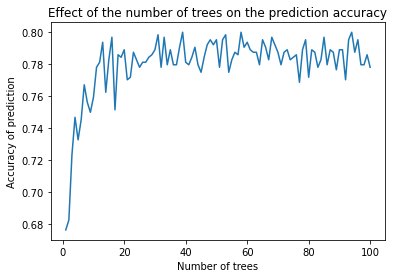

[0.6765625, 0.6828125, 0.7234375, 0.746875, 0.7328125, 0.7453125, 0.7671875, 0.75625, 0.75, 0.759375, 0.778125, 0.78125, 0.79375, 0.7625, 0.7828125, 0.796875, 0.7515625, 0.7859375, 0.784375, 0.7890625, 0.7703125, 0.771875, 0.7875, 0.7828125, 0.778125, 0.78125, 0.78125, 0.784375, 0.7859375, 0.7890625, 0.7984375, 0.778125, 0.796875, 0.7796875, 0.7890625, 0.7796875, 0.7796875, 0.790625, 0.8, 0.78125, 0.7796875, 0.784375, 0.790625, 0.7796875, 0.775, 0.784375, 0.7921875, 0.7953125, 0.7921875, 0.7953125, 0.778125, 0.7953125, 0.7984375, 0.775, 0.7828125, 0.7875, 0.7859375, 0.8, 0.790625, 0.79375, 0.7890625, 0.7875, 0.7875, 0.7796875, 0.7953125, 0.790625, 0.7828125, 0.796875, 0.7921875, 0.7875, 0.7796875, 0.7875, 0.7890625, 0.7828125, 0.784375, 0.7859375, 0.76875, 0.7890625, 0.7953125, 0.771875, 0.7890625, 0.7875, 0.778125, 0.7828125, 0.796875, 0.7796875, 0.7890625, 0.7875, 0.7765625, 0.7890625, 0.7890625, 0.7703125, 0.7953125, 0.8, 0.7875, 0.7953125, 0.7796875, 0.7796875, 0.7859375, 0.778125]

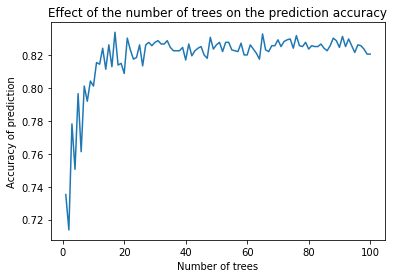

[0.735204081632653, 0.7137755102040816, 0.7780612244897959, 0.7505102040816326, 0.7964285714285714, 0.7612244897959184, 0.8010204081632653, 0.7918367346938775, 0.8040816326530612, 0.8010204081632653, 0.8153061224489796, 0.8142857142857143, 0.8239795918367347, 0.8112244897959183, 0.8260204081632653, 0.8127551020408164, 0.8336734693877551, 0.8137755102040817, 0.814795918367347, 0.8086734693877551, 0.8301020408163265, 0.8229591836734694, 0.8173469387755102, 0.8183673469387756, 0.8260204081632653, 0.813265306122449, 0.8260204081632653, 0.8275510204081633, 0.8255102040816327, 0.8275510204081633, 0.8285714285714286, 0.826530612244898, 0.826530612244898, 0.8285714285714286, 0.8244897959183674, 0.8224489795918367, 0.8224489795918367, 0.8224489795918367, 0.8244897959183674, 0.8168367346938775, 0.826530612244898, 0.8193877551020409, 0.8224489795918367, 0.8239795918367347, 0.825, 0.8198979591836735, 0.8178571428571428, 0.8306122448979592, 0.823469387755102, 0.8260204081632653, 0.8275510204081633,

In [94]:
def random_forests(wine_set):
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]

    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data#
    classifier = RandomForestClassifier(n_estimators=25)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion matrix:\n', sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

    # to display the relative importance of each predictive variable
    model = ExtraTreesClassifier()
    model.fit(pred_train, tar_train)

    print('\nImportance of predictors:')
    dct = dict()
    for c in range(len(predictors.columns)):
        dct[predictors.columns[c]] = model.feature_importances_[c]
    print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

    # run different numbers of trees to see the effect of the number on the accuracy of the prediction
    n = 100
    accuracy = [0]*n
    for i in range(n):
        classifier = RandomForestClassifier(n_estimators=i+1)
        classifier = classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)
        accuracy[i] = sklearn.metrics.accuracy_score(tar_test, predictions)

    plt.plot(range(1, n+1), accuracy)
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy of prediction")
    plt.title("Effect of the number of trees on the prediction accuracy")
    plt.show()

    print(accuracy)

print('----------------Random Forests------------------------')
call(random_forests)

----------------Lasso Regression------------------------

Red Wine

Predictors and their regression coefficients:
density : -0.020095347815245246
alcohol : 0.29312748593623916
sulphates : 0.13551717868691343
pH : -0.027802563013414393
volatile_acidity : -0.19031297553741972
chlorides : -0.0839391724515737
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.017520691488967094
free_sulfur_dioxide : 0.0
total_sulfur_dioxide : -0.07928212046868229

Alpha: 0.00024799947518914513


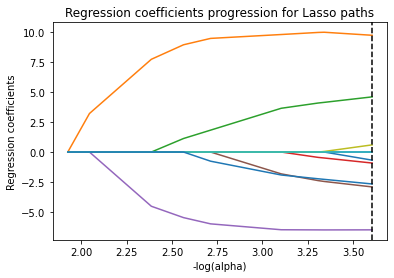

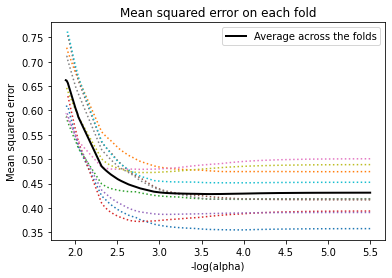


Mean squared error for training data: 0.4203875908920114
Mean squared error for test data: 0.42181400455172563

R-square for training data: 0.3629641127620282
R-square for test data: 0.33280737417126016

White Wine

Predictors and their regression coefficients:
density : -0.24939511143227913
alcohol : 0.3303025577975148
sulphates : 0.06748773072115528
pH : 0.05785746749830192
volatile_acidity : -0.19002207866367524
chlorides : -0.004067080798942687
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.2949812850759536
free_sulfur_dioxide : 0.055207920365495364
total_sulfur_dioxide : -0.0130067353289141

Alpha: 9.211601493058607e-05


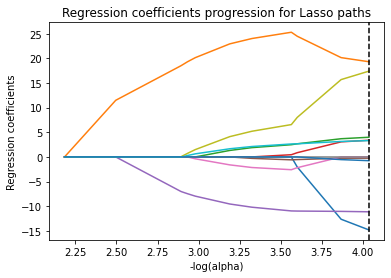

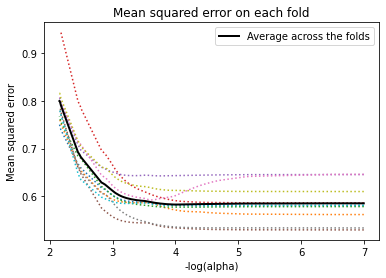


Mean squared error for training data: 0.5763917424436986
Mean squared error for test data: 0.5387294766360478

R-square for training data: 0.2784951594704025
R-square for test data: 0.28165901553327566


In [97]:
def lasso_regr(wine_set):

    pred = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                    'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    predictors = pred.copy()
    targets = wine_set.quality

    # standardize predictors to have mean=0 and sd=1
    predictors = pd.DataFrame(preprocessing.scale(predictors))
    predictors.columns = pred.columns
    # print(predictors.head())

    # split into training and testing sets
    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.3, random_state=123)

    # specify the lasso regression model
    model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

    print('Predictors and their regression coefficients:')
    d = dict(zip(predictors.columns, model.coef_))
    for k in d:
        print(k, ':', d[k])

    # plot coefficient progression
    m_log_alphas = -np.log10(model.alphas_)
    # ax = plt.gca()
    plt.plot(m_log_alphas, model.coef_path_.T)
    print('\nAlpha:', model.alpha_)
    plt.axvline(-np.log10(model.alpha_), linestyle="dashed", color='k', label='alpha CV')
    plt.ylabel("Regression coefficients")
    plt.xlabel("-log(alpha)")
    plt.title('Regression coefficients progression for Lasso paths')
    plt.show()
     # plot mean squared error for each fold
    m_log_alphascv = -np.log10(model.cv_alphas_)
    plt.plot(m_log_alphascv, model.mse_path_, ':')
    plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
    plt.legend()
    plt.xlabel('-log(alpha)')
    plt.ylabel('Mean squared error')
    plt.title('Mean squared error on each fold')
    plt.show()

    # Mean squared error from training and test data
    train_error = mean_squared_error(tar_train, model.predict(pred_train))
    test_error = mean_squared_error(tar_test, model.predict(pred_test))
    print('\nMean squared error for training data:', train_error)
    print('Mean squared error for test data:', test_error)

    rsquared_train = model.score(pred_train, tar_train)
    rsquared_test = model.score(pred_test, tar_test)
    print('\nR-square for training data:', rsquared_train)
    print('R-square for test data:', rsquared_test)
#
print('----------------Lasso Regression------------------------')
call(lasso_regr)



Red Wine



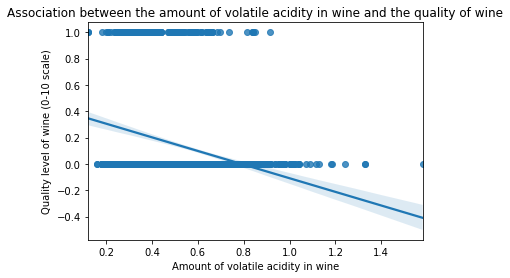

mean of the volatile acidity variable =  0.5278205128205131
mean of the volatile acidity variable after normalization =  -3.210203973955229e-16

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 12 May 2021   Prob (F-statistic):           2.96e-28
Time:                        18:08:46   Log-Likelihood:                -494.64
No. Observations:                1599   AIC:                             993.3
Df Residuals:                    1597   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            non

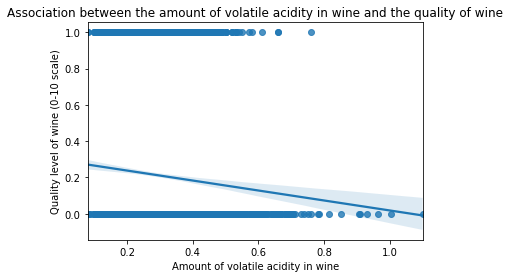

mean of the volatile acidity variable =  0.27824111882401087
mean of the volatile acidity variable after normalization =  -1.0712870180806514e-15

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     22.23
Date:                Wed, 12 May 2021   Prob (F-statistic):           2.49e-06
Time:                        18:08:47   Log-Likelihood:                -2593.3
No. Observations:                4898   AIC:                             5191.
Df Residuals:                    4896   BIC:                             5204.
Df Model:                           1                                         
Covariance Type:            n

In [98]:
def basic_linear(wine_set):
     # recode quality into 2 groups: 0:{3,4,5,6}, 1:{7,8,9}
    recode = {3: 0, 4: 0, 5:0, 6:0, 7:1, 8:1, 9:1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)
    scat0 = seaborn.regplot(x="volatile_acidity", y="quality_c", fit_reg=True, data=wine_set)
    plt.xlabel("Amount of volatile acidity in wine")
    plt.ylabel("Quality level of wine (0-10 scale)")
    plt.title("Association between the amount of volatile acidity in wine and the quality of wine")
    plt.show()

    # centering the explanatory variable by subrtacting the mean
    f_acidity_mean = wine_set["volatile_acidity"].mean()
    print("mean of the volatile acidity variable = ", f_acidity_mean)
    wine_set["volatile_acidity"] = wine_set["volatile_acidity"] - f_acidity_mean
    print("mean of the volatile acidity variable after normalization = ", wine_set["volatile_acidity"].mean())

    print ("\nOLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:")
    model1 = smf.ols(formula="quality_c ~ volatile_acidity", data=wine_set)
    results1 = model1.fit()
    print(results1.summary())


call(basic_linear)

In [7]:
import seaborn as sns

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [12]:
wine = pd.read_csv('C:/Users/Hp/Desktop/priya/winequality-red.csv')


In [13]:
wine.head()


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [14]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [22]:
label_quality = LabelEncoder()


In [ ]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
sns.countplot(wine['quality'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [29]:
sc = StandardScaler()


In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [39]:
import scipy
from scipy.io import arff
from sklearn.datasets import make_multilabel_classification
X, y = make_multilabel_classification(sparse = True, n_labels = 20,
return_indicator = 'sparse', allow_unlabeled = False)



In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))


In [44]:
svc = SVC()


In [45]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [48]:

import os
import pandas as pd


In [50]:
df = pd.read_csv('C:/Users/Hp/Desktop/priya/winequality-red.csv')
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [51]:
df.describe()


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85...
freq,4


In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,ax=ax)
plt.show()

In [56]:
df_copy = df.copy()


In [59]:
from sklearn.preprocessing import StandardScaler
import numpy as np




In [60]:
from scipy import stats
